<font size=6px><center><b>Real or Not? NLP with Disaster Tweets</b></center></font>
<br>
<font size=4px><center><b>Part 1</b></center></font>
<br>
<font size=2px><center><b>Ignat Baltsyukevich(IgnatBaltsyukevich@coherentsolutions.com)</b></center></font>

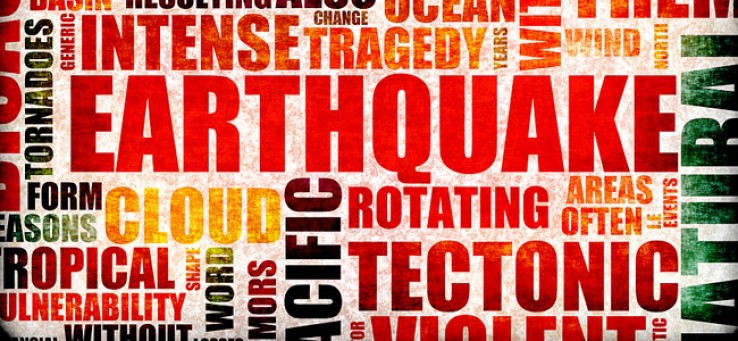

<font size=4px><b>Link to kaggle competition: [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started)</b></font>
<br>
<br>
<font size=4px><b>[Link to data](https://drive.google.com/drive/folders/1ZLlAlTKBkIrSMetqX4AoLADEEMulnY43?usp=sharing)</b></font>

# ML Pipeline

* ## **[Business domain](#Business-domain)**
*   [Define business goals and objectives](#Define-business-goals-and-objectives)
*   [Determine the problems to solve](#Determine-the-problems-to-solve)

* ## **[Data analysis](#Introduction)**
*   [Extract, transform and load data](#Extract,-transform-and-load-data)
*   [Exploratory data analysis](#Exploratory-data-analysis)
*   [Prepare data according to the ML algorithm](#Prepare-data-according-to-the-ML-algorithm)

* ## **[Frameworks and Modelling](#Frameworks-and-Modelling)**
*   [Train ML model and validate obtained results](#Train-ML-model-and-validate-obtained-results)
*   [Tune parameters of the model for better results](#Tune-parameters-of-the-model-for-better-results)

* ## **<font color='grey'>Hosting and Delivery</font>**

*   <font color='grey'>Deploy model into production environment</font>
*   <font color='grey'>Monitor and improve deployed model</font>

* ## **[Conclusion](#Conclusion)**
*   [Usefull links](#Usefull-links)

# Business domain

## Define business goals and objectives

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

## What is NLP?
Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

## What is NLP used for?
**Natural Language Processing is the driving force behind the following common applications:**
- Language translation applications such as Google Translate
- Word Processors such as Microsoft Word and Grammarly that employ NLP to check grammatical accuracy of texts.
- Interactive Voice Response (IVR) applications used in call centers to respond to certain users’ requests.
- Personal assistant applications such as OK Google, Siri, Cortana, and Alexa.
- Sentiment analysis for reviews
- Stopping spam
- Identifying fake news


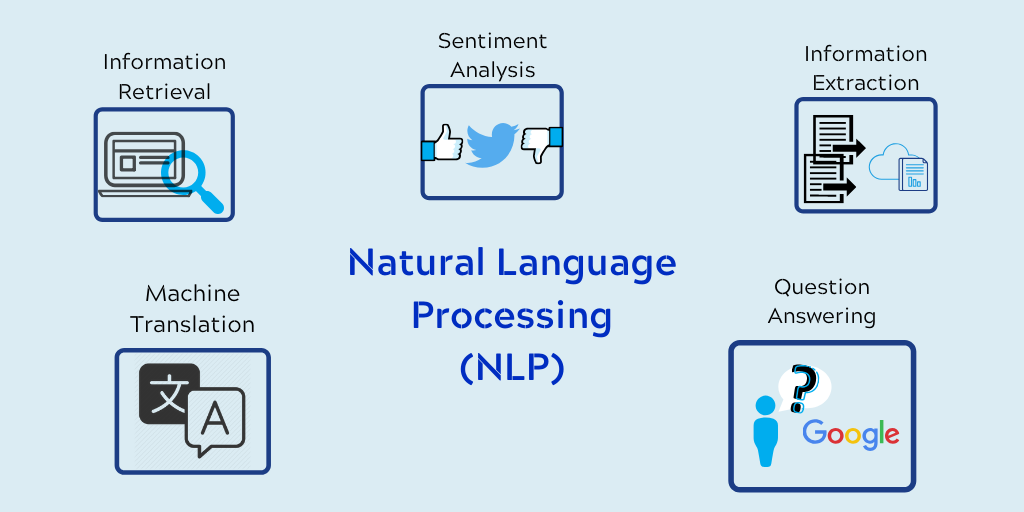


### **Goals:**
* Predict whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.
* Get acquainted with the natural language processing.

### **Objectives:**
*  Exploratory data analysis
*  Text cleaning 
*  Text vectorization
*  Choosing and implementing ML model

## Determine the problems to solve

### **Specified approaches to solve the problems:**

* EDA using pandas, numpy
* Regular expressions and nltk library
* Bag of words, TF-IDF
* Linear models

In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
import re
import string
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, LSTM, GRU

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data analysis

## Extract, transform and load data

In [ ]:
#Путь к данным
#ВАЖНО! При локальной работе с данными поменяйте это на местоположение данных на вашей машине.
# Найти их можно <dataset/ML_Weekly/7/NLP_tweets.zip>
train = pd.read_csv('train.csv>')
test = pd.read_csv('test.csv>')

## Exploratory data analysis

### Data description  
**Columns:**

- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

**Files:**
- train.csv - the training set
- test.csv - the test set

In [ ]:
train.sample(5)

id  ... target
602    871  ...      1
5119  7300  ...      0
2830  4068  ...      1
361    519  ...      1
5848  8356  ...      0

[5 rows x 5 columns]

In [ ]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [ ]:
# Example of non-catastrophic tweet
train['text'][2052]

'i wanna get a danger days tattoo so bad how cool would that spider look like on someones wrist or smth'

In [ ]:
# Example of catastrophic tweet
train['text'][2165]

'#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...  http://t.co/MRVXBZywd4'

In [ ]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [ ]:
train['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
train['keyword'].fillna('Unknown', inplace=True)
test['keyword'].fillna('Unknown', inplace=True)

train['location'].fillna('Unknown', inplace=True)
test['location'].fillna('Unknown', inplace=True)

## Prepare data according to the ML algorithm

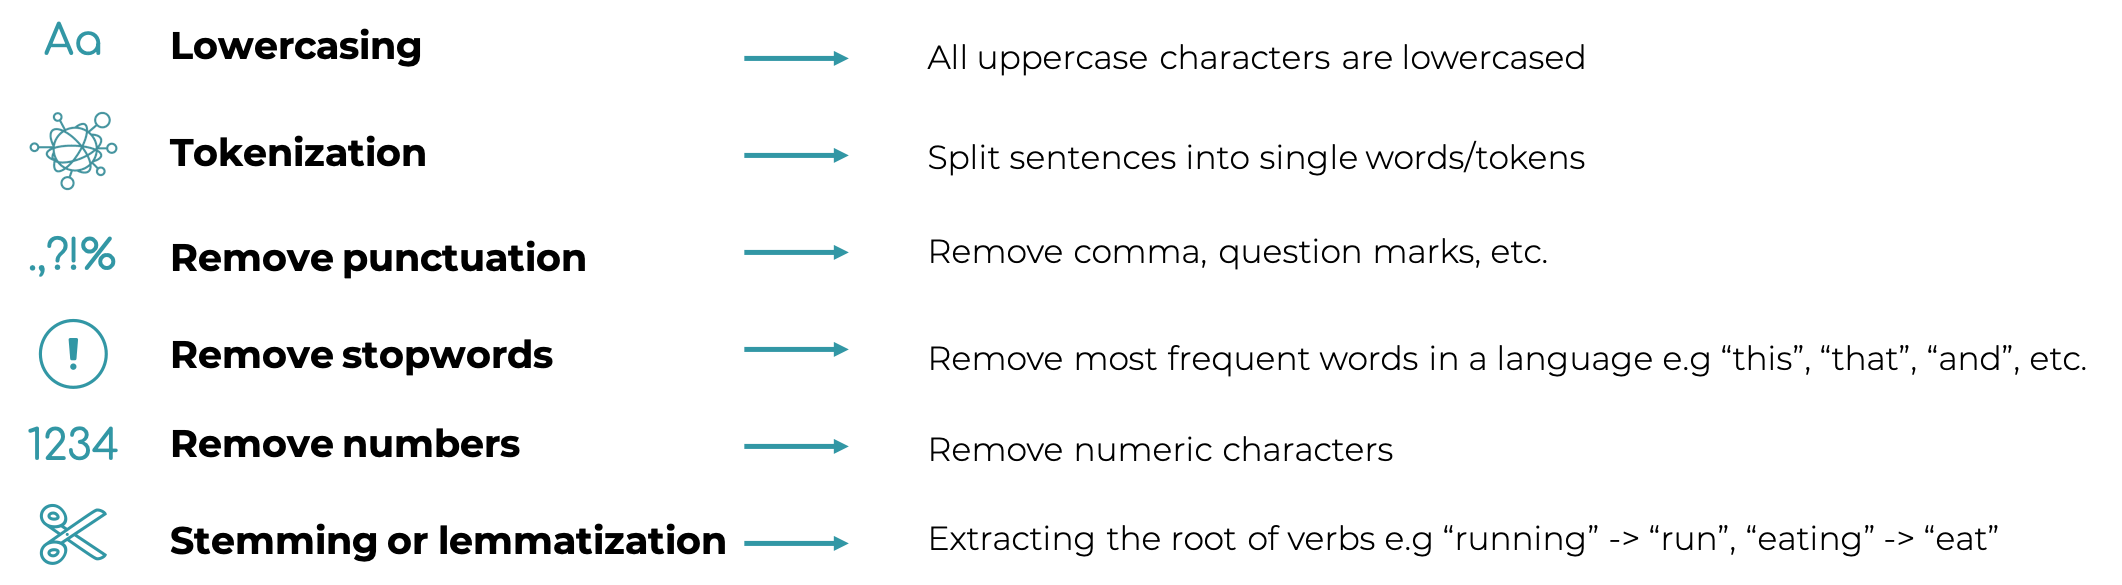

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

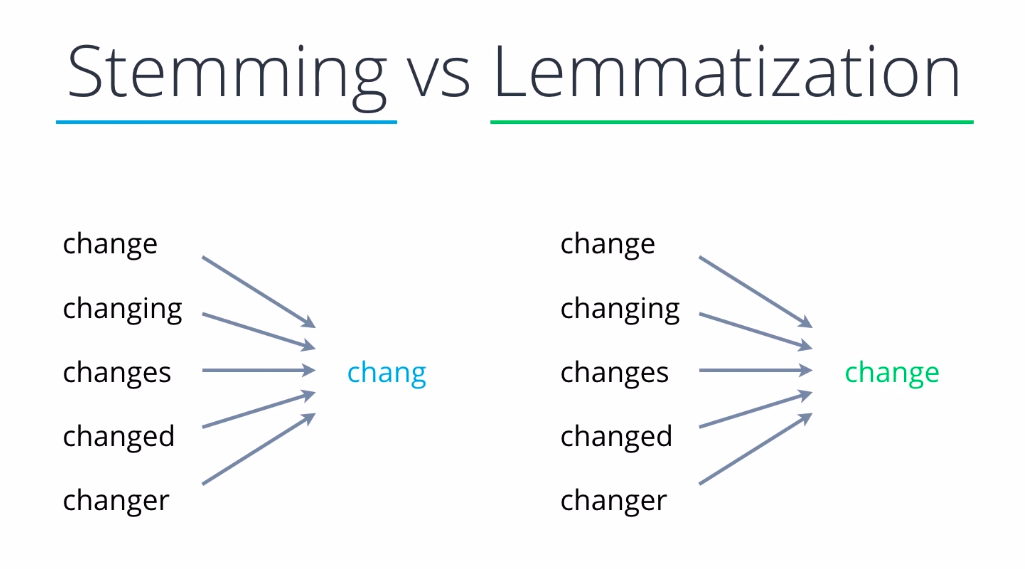

In [ ]:
def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove links
    text = re.sub(r'<.*?>', '', text) # Remove html tags 
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text = re.sub('\s+', ' ', text).strip() # Remove leading, trailing, and extra spaces
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # Remove emoji
    
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if word.isalpha()]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
train['text_clean'] = train['text'].apply(clean_text)
test['text_clean'] = test['text'].apply(clean_text)

In [ ]:
# Examples of original and preprocessed texts
print(train['text'][2165])
print()
print(train['text_clean'][2165])

#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...  http://t.co/MRVXBZywd4

aircraft debris find la reunion miss malaysia airline


## Bag of words and TF-IDF

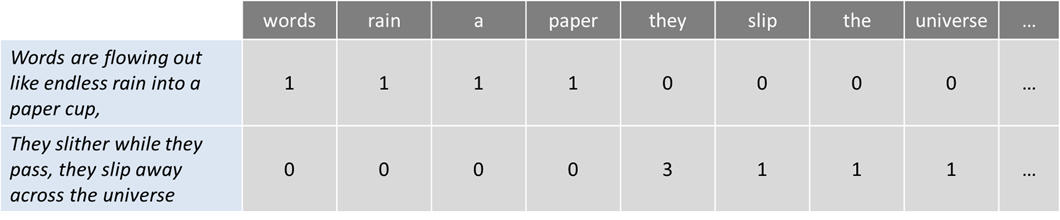

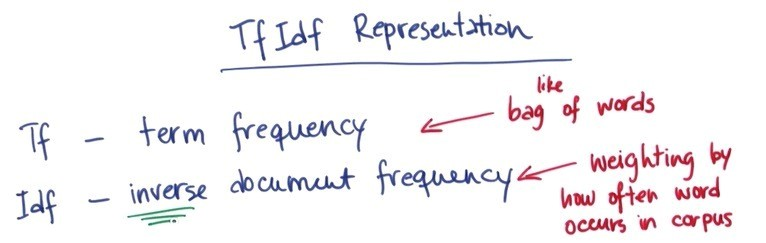

In [ ]:
count_vector = CountVectorizer()
tfidf_vector = TfidfVectorizer()

In [ ]:
X_train_count_vec = count_vector.fit_transform(train['text_clean'])
X_train_count_vec

<7613x12954 sparse matrix of type '<class 'numpy.int64'>'
	with 62543 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf = tfidf_vector.fit_transform(train['text_clean'])
X_train_tfidf

<7613x12954 sparse matrix of type '<class 'numpy.float64'>'
	with 62543 stored elements in Compressed Sparse Row format>

# Frameworks and Modelling

## Select ML model and validate obtained results

In [ ]:
X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test

In [ ]:
svc = LinearSVC(random_state=12)
lr = LogisticRegression(random_state=12)
nb = MultinomialNB()
ridge = RidgeClassifier(random_state=12)

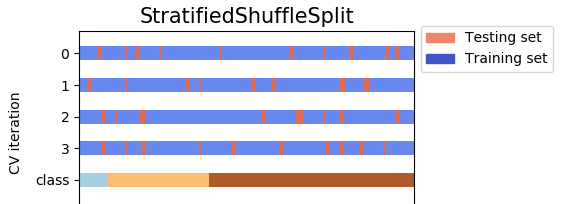

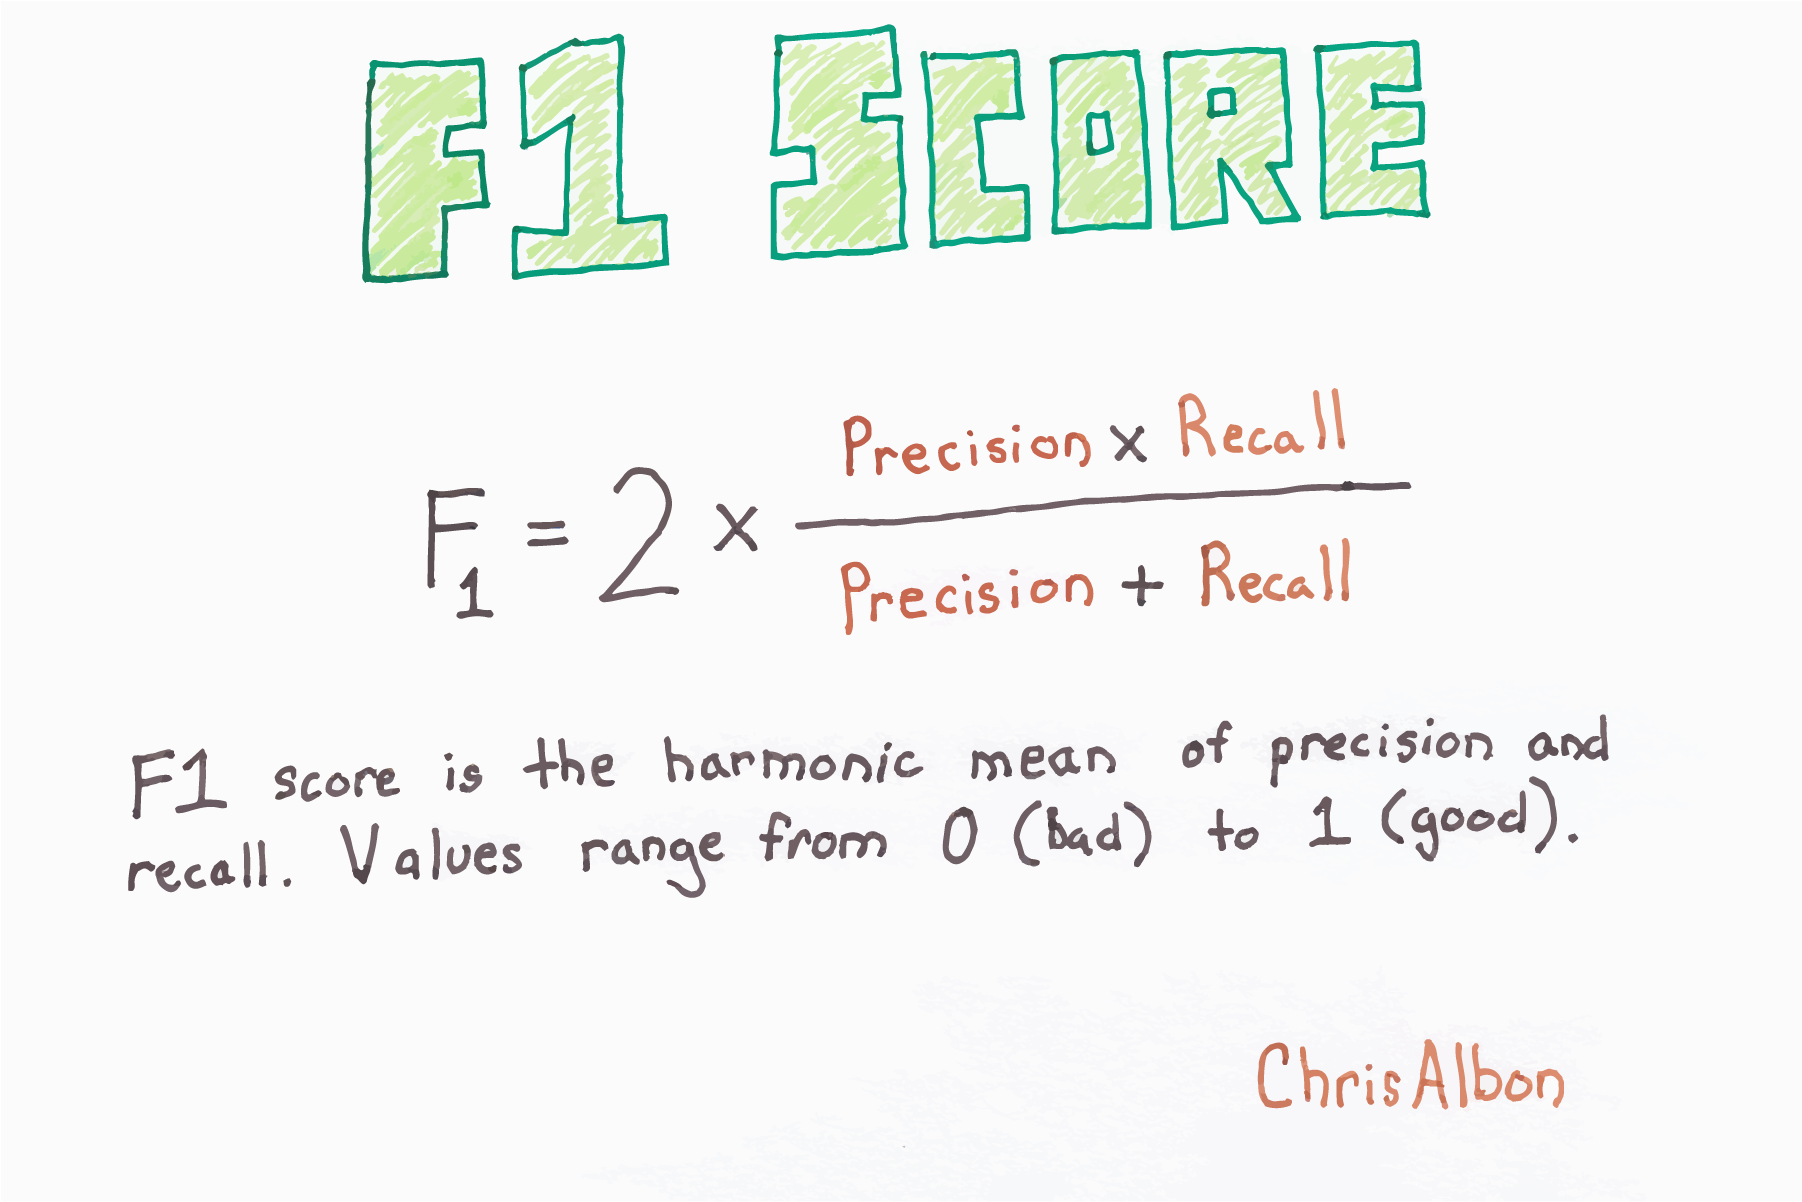

In [ ]:
vectorizer = [X_train_count_vec, X_train_tfidf]
models = [svc, lr, nb, ridge]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=995)

In [ ]:
for model in models:
    print(model)
    for vect in vectorizer:
        cv_score = cross_val_score(model, vect, y_train, cv=cv, scoring='f1')
        print('Cross validation F-1 score: %.3f' %np.mean(cv_score))
    print()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=12, tol=0.0001,
          verbose=0)
Cross validation F-1 score: 0.723
Cross validation F-1 score: 0.734

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Cross validation F-1 score: 0.745
Cross validation F-1 score: 0.733

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Cross validation F-1 score: 0.746
Cross validation F-1 score: 0.737

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=12, solver='auto',
                tol=0.0

*Best model for bag of words: MultinomialNB (0.746)*. 
*Best model for tfidf: RidgeClassifier (0.739)*

## Tune parameters of the model for better results

In [ ]:
def tune_vectorizer(vectorizer, classifier, param_grid, scoring, cv, X_column, y):
    pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

    grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, n_jobs=-1, cv=cv)
    grid_search.fit(X=X_column, y=y)

    return grid_search.best_score_, grid_search.best_params_

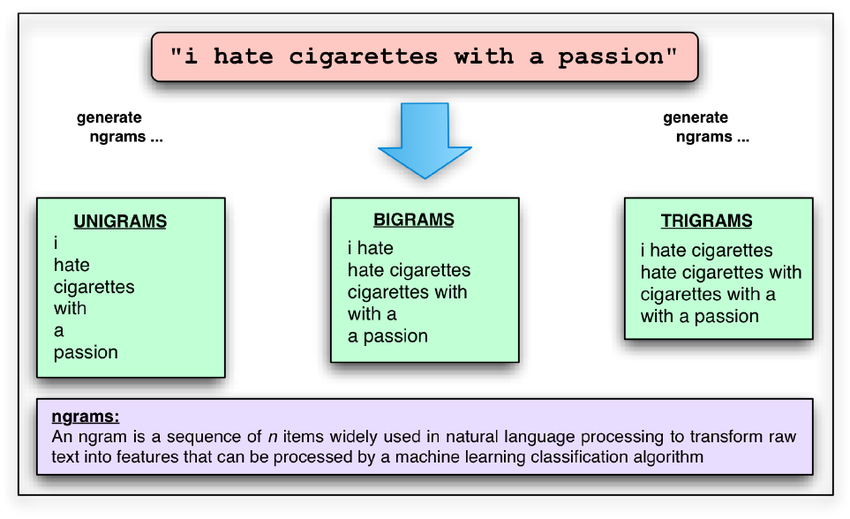

In [ ]:
f1 = make_scorer(f1_score)

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_features': np.arange(0, 110000, 10000)
}

tune_vectorizer(count_vector, nb, grid, f1, cv, X_train['text_clean'], y_train)

(0.7531057927465993,
 {'vectorizer__max_features': 50000, 'vectorizer__ngram_range': (1, 2)})

In [ ]:
tune_vectorizer(tfidf_vector, ridge, grid, f1, cv, X_train['text_clean'], y_train)

(0.7541088196076698,
 {'vectorizer__max_features': 60000, 'vectorizer__ngram_range': (1, 3)})

In [ ]:
grid = {
    'vectorizer__ngram_range': [(1, 2), (1, 3)],
    'vectorizer__max_features': np.arange(40000, 80000, 1000)
}

tune_vectorizer(tfidf_vector, ridge, grid, f1, cv, X_train['text_clean'], y_train)

(0.7549314485869016,
 {'vectorizer__max_features': 42000, 'vectorizer__ngram_range': (1, 2)})

In [ ]:
tfidf_best = TfidfVectorizer(ngram_range=(1,2), max_features=42000)
pipe = Pipeline([('vectorizer', tfidf_best),
                 ('classifier', ridge)])

cv_score = cross_val_score(pipe, X_train['text_clean'], y_train, cv=cv, scoring='f1')
print('Cross validation F-1 score:', np.mean(cv_score))

Cross validation F-1 score: 0.7549314485869016


# Conclusion

In the 1 part of meetup we got baseline model using TF-IDF and Ridge Classifier. Before this we made Exploratory data analysis and text preprocessing

## Usefull links

[**Основы Natural Language Processing**](https://habr.com/ru/company/Voximplant/blog/446738/)
<br>
[**Text Data Vectorization**](https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7)
<br>
[**Как научить компьютер понимать тексты**](https://dev.by/news/nlp-is-fun)
<br>
[**Stratified Shuffle Split**](https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36)
<br>
[**F1 score, recall and precision**](http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html)